# Explore


## where we are living currently:
- we have done so far:
    - planning:
        - establishing what we want to know about our data in general
    - acquision:
        - how we extract and examine our data
        - how ee make the cprocess of getting the data spedy replicatable and reliable
    - prep
        - examining all the features on a univariate level
        - examining the data for any corruption redundancy or incongruency
        - executing the changes desired from the observed shortcomings mentioned above
        - how we make that process replicable modular and reliable
### explorration:
- what can we say abou the data now that we have it in proper working condition?

steps in this process
1. univariate exploration
   - visualizations (distributive
2. bivariate exploration
    - visualizations (compariative)
    - statistical testing
3. multivariate exploration
    - visualizations (comparative)
    - statistical testing
    - clues for feature engineering

In [1]:
# witin these steps:
# what do we wnt to know about the data in this contx
# what specific qusetion can we ask?
# is that specififc queustion something we can transform into a 
# stats test / null,alt hypothesis
# does this question relate to the outcome that we want to predict with our data?

objective at the end of theis phase:
- we will have a train, validate, and test set as we did before
- we may or may not have the desire to add in new feature engineesing or transformative processes to our original traing set (which would require a new edit to the preprocessing phase of our prepare script)
- we will have concrete observations that we have made based on strictly the training set within our explorationr data analysis
- the concrete obsrvations that we make will allow us to select he most consequential features and variables to begin assessing with our predictive modeling as we go into th emodeling phase of the pipeline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [6]:
train, validate, test = prepare.split_data(prepare.prep_titanic(acquire.get_titanic_data()))

In [7]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [ ]:
# initial questions
# does class have impact on survial
# does age have impact on survival
# does fare have an impact on survival
# siblings or spouses have impact on survival?


In [8]:
# first questions
# beforw we stat bivariate or multivariate exploration
# lets examine how the inforamtion looks on a univariate
# once again

In [9]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [37]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
#         if train[col].nunique() < 10:
#             cat_cols.append(col)
        num_cols.append(col)

In [38]:
cat_cols

['sex', 'embark_town']

In [17]:
num_cols

['survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [18]:
cat_cols = cat_cols[:-2]

In [19]:
explore_cols = cat_cols + num_cols

In [20]:
# looping through this stuff and looking at it on a univariate basis
# to get a breakdown of spread/distribution for my coninuous features and propotion for categoricals

In [21]:
# univariate fro continuous:

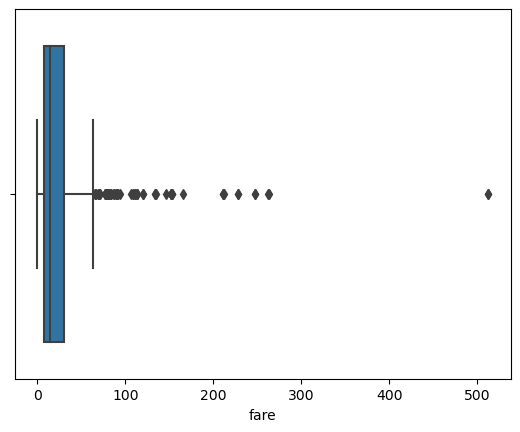

In [22]:
sns.boxplot(data=train, x='fare')
plt.show()

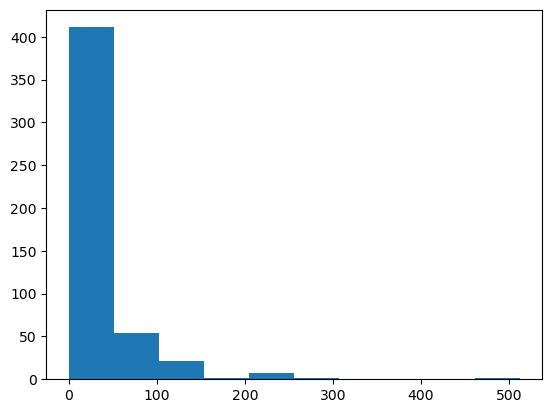

In [23]:
plt.hist(train['fare'])
plt.show()

In [24]:
train.fare.describe()

count    498.000000
mean      32.651287
std       50.963055
min        0.000000
25%        7.925000
50%       14.479150
75%       30.500000
max      512.329200
Name: fare, dtype: float64

In [ ]:
# what about for categorical?

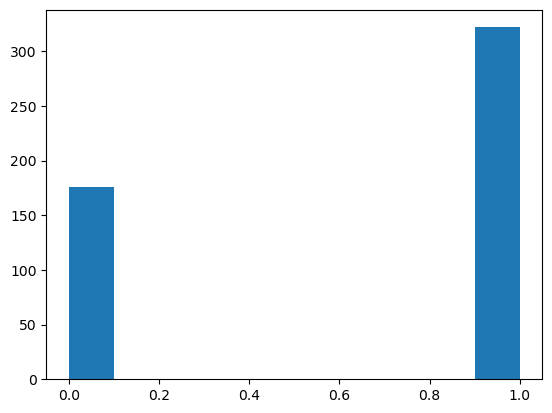

In [26]:
plt.hist(train.sex_male)
plt.show()
# not great vis

<AxesSubplot:xlabel='sex_male', ylabel='count'>

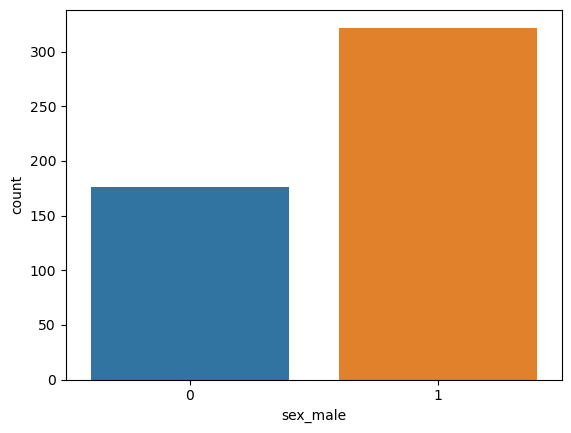

In [27]:
sns.countplot(data=train, x='sex_male')

In [29]:
pd.concat([train.sex_male.value_counts(normalize=False),
           train.sex_male.value_counts(normalize=True)],
          axis=1)

,sex_male,sex_male
1,322,0.646586
0,176,0.353414


In [ ]:
# we can loop through these visualizations using a loop

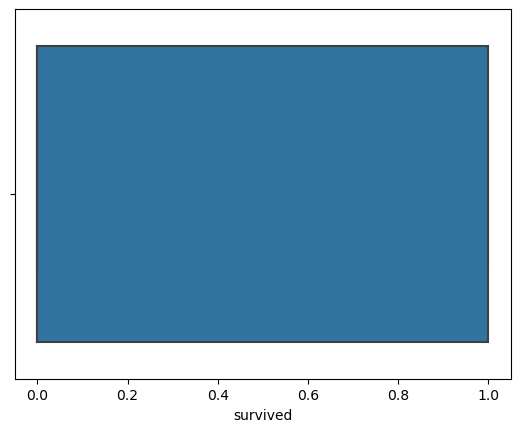

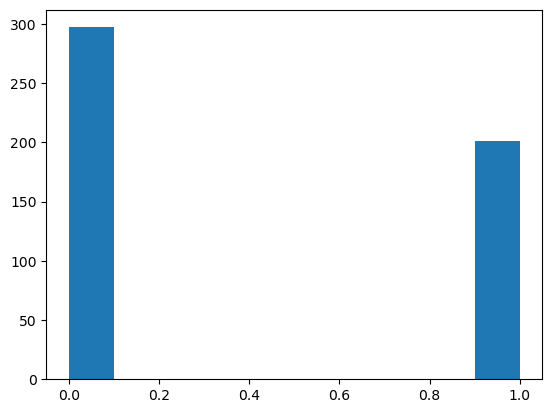

-----------


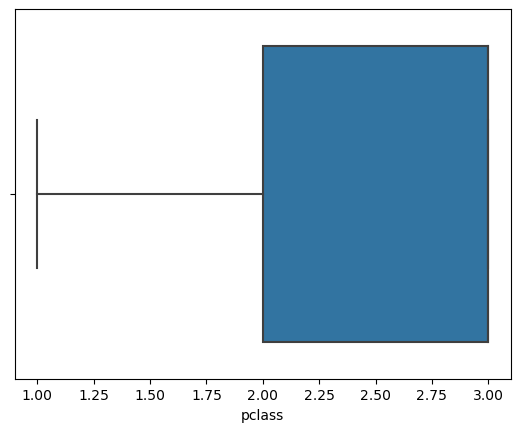

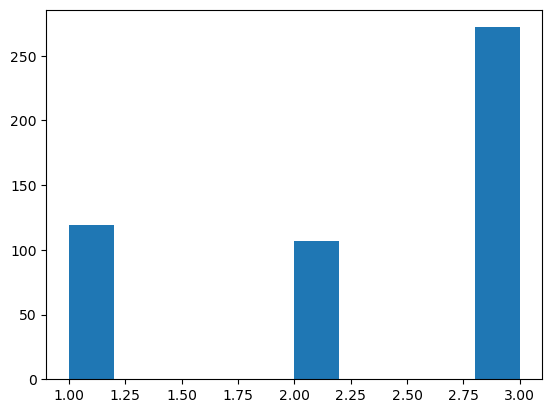

-----------


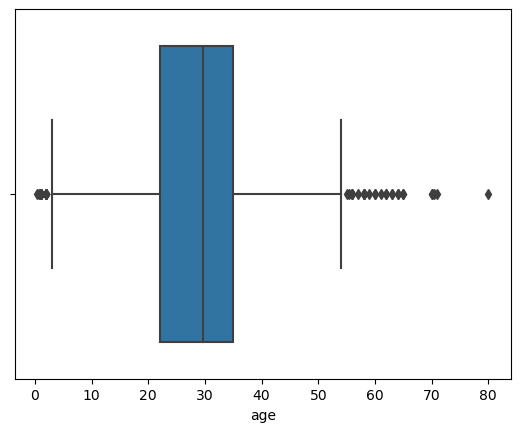

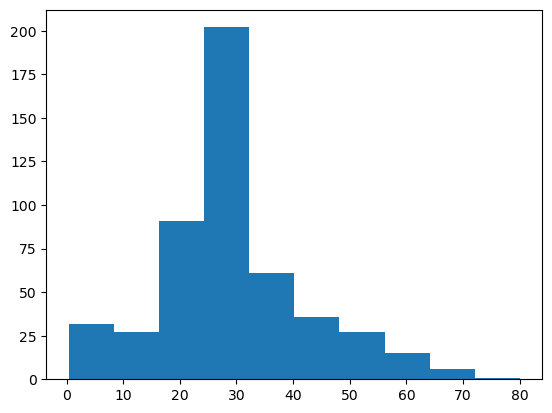

-----------


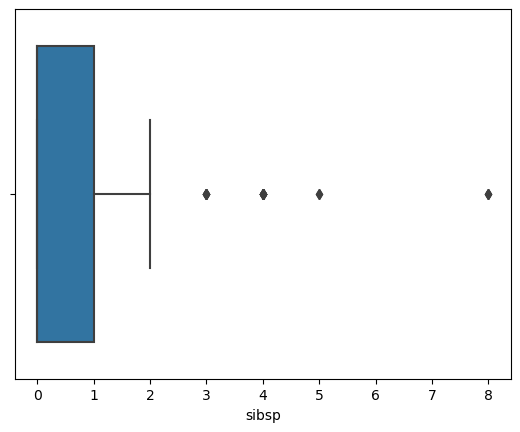

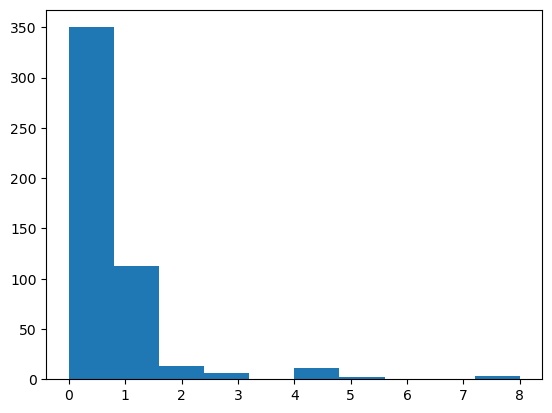

-----------


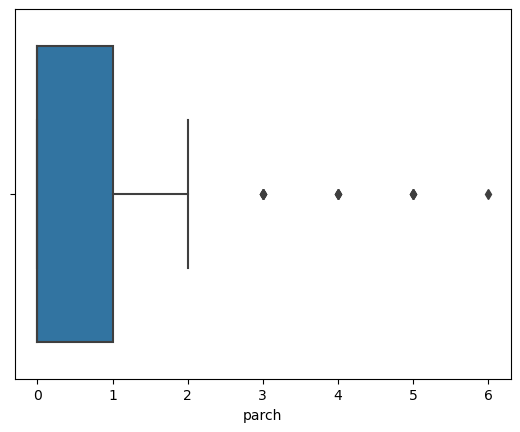

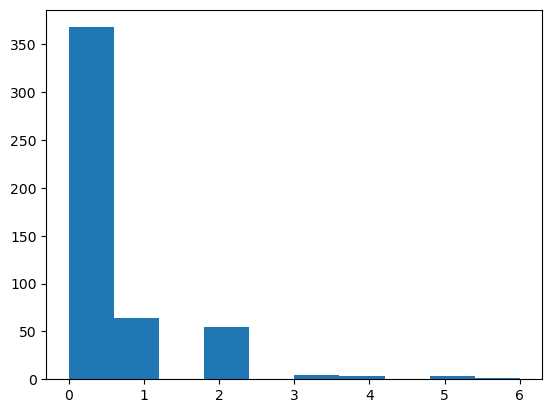

-----------


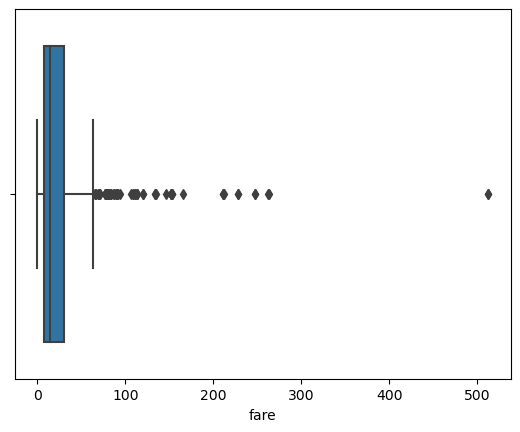

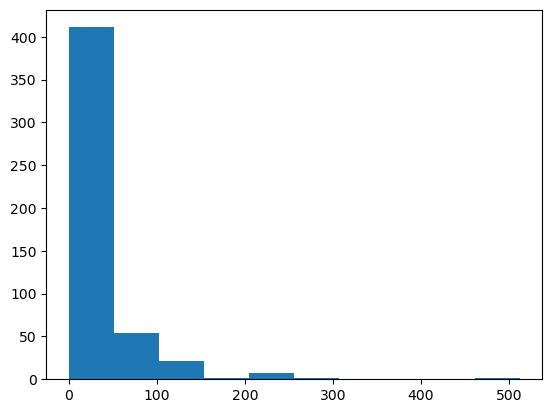

-----------


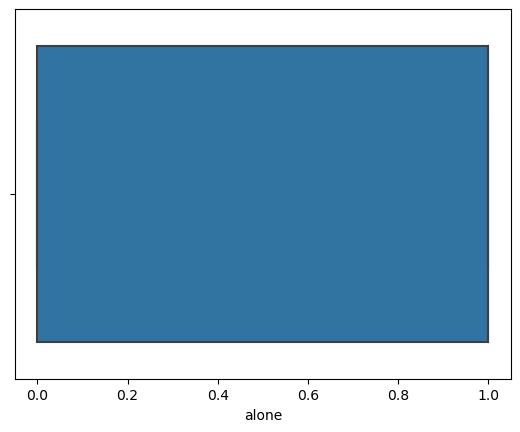

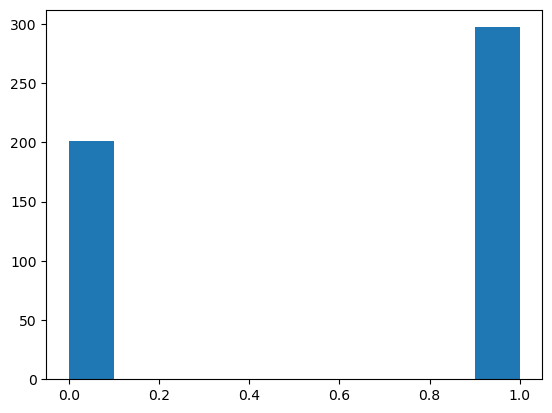

-----------


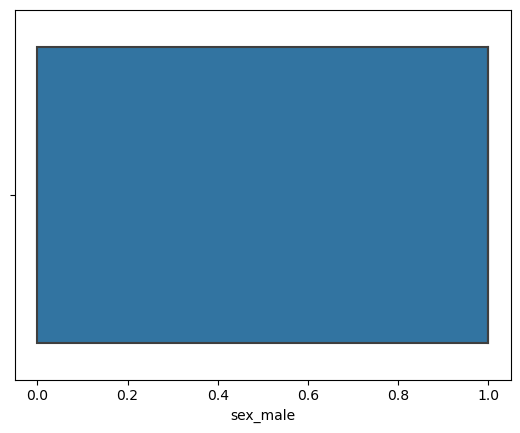

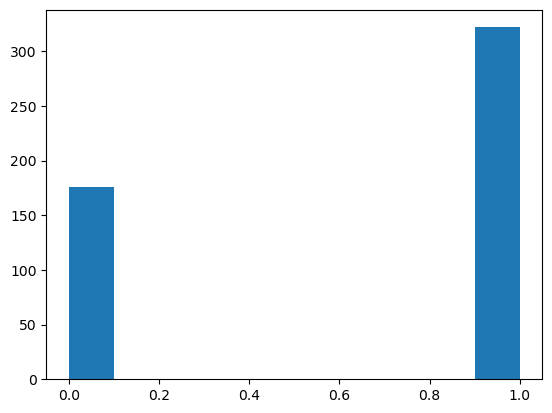

-----------


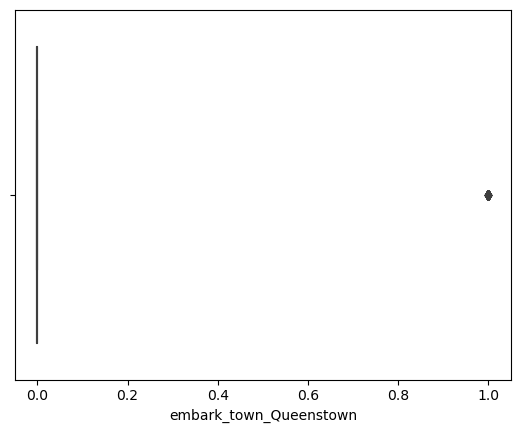

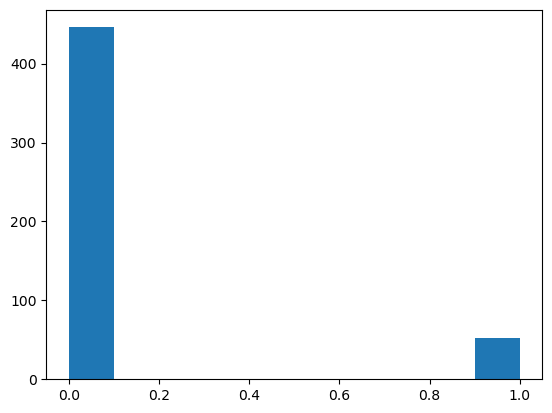

-----------


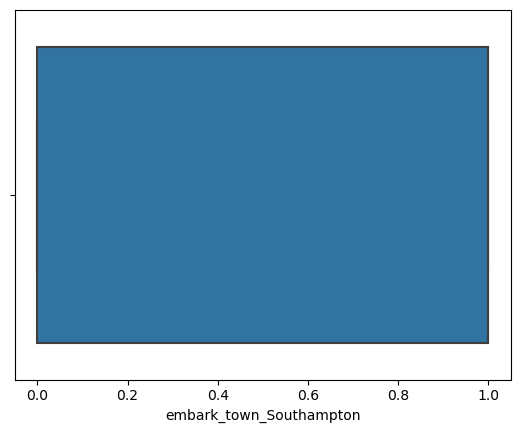

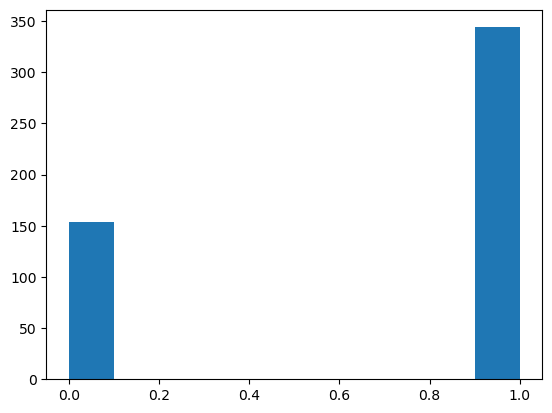

-----------


In [39]:
for col in explore_cols:
    if col in cat_cols:
        print(f'univariate assessment of feature {col}')
        sns.countplot(data=train, x=col)
        pd.concat([train[col].value_counts(normalize=False),
               train[col].value_counts(normalize=True)],
              axis=1)
    else:
        sns.boxplot(data=train, x=col)
        plt.show()
        plt.hist(train[col])
        plt.show()
        train[col].describe()
    print('-----------')
        
        
# categorical
# sns.boxplot(data=train, x='fare')
# plt.show()
# plt.hist(train['fare'])
# plt.show()
# train.fare.describe()

# #univarriate
# sns.countplot(data=train, x='sex_male')
# pd.concat([train.sex_male.value_counts(normalize=False),
#            train.sex_male.value_counts(normalize=True)],
#           axis=1)

initial takaways:
we have fairly normal dist on age
faire is heviliy skewed

In [33]:
# bivariate and multivariate

In [34]:
# think about what knind of visualizations we want to create for the type
# of conclusionss that we wish to draw

In [41]:
for col in cat_cols:
    if col != 'survived':
        sns.barplot(data='train', x=col, y = 'survived', ci=False)
        plt.title('survival of passengers based on {col}')
        plt.show()

AttributeError: 'str' object has no attribute 'get'

is survival (a categorical)
different across sibsp values ( categorical)
categorical vs categorical:
chi-squared

h$_0$ ; thre is no proportional difference in the survial of passengers basedon sibsp

h$_a$ : thre is a proportional difference in the survial of passengers basedon sibsp

In [ ]:
def bins_vals(val):    
    if val == 0:
        return 0
    elif val == 1:
        return 1
    else:
        return 2

In [ ]:
train['sibsp_custom']